# Exploratory Data Analysis
### Sales Analysis

#### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Import Data

In [3]:
# encoding='unicode_escape' a dummy encoding that converts all non-ASCII characters into their \uXXXX representations
data =  pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

#### Data Manipulation

In [4]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.shape

(11251, 15)

#### Data cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#### Handling Missing/Null Values

In [7]:
# status and unnamed1 columns are the columns with null values. Therefore it will be removed from the dataset
data.drop(["Status", "unnamed1"], axis=1, inplace=True) #axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns
# inplace saves the dataframe after performing any operations

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
# returns False if the values is not null and returns True if the value is null
data.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# Amount column/ feature has 12 values that is null so we simply remove the entries from the dataset whose value is null
data.dropna(inplace=True) #dropna: drop NAN 


In [12]:
data.shape

(11239, 13)

#### changing the datatype of a column

In [13]:
# change the datatype of any column
data['Amount'] = data['Amount'].astype('int') #astype convert one datatype of a feature or column to other
# the datatype of the Amount column if changed from float to integer

In [14]:
#### Rename a feature/Column name

In [15]:
data.rename(columns={"Marital_Status": "Married"})
# data.rename(columns={'Marital_status':'Married'}) # error: Double quotes is needed

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [16]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
# describe() on selective columns
data[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Visualizing and analyzing data 
#### 1. Gender

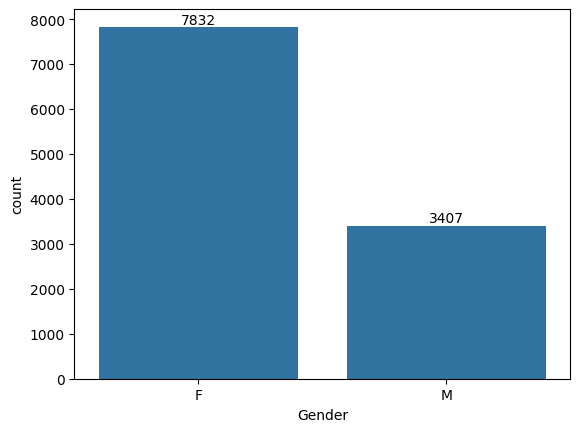

In [18]:
vis = sns.countplot(x="Gender", data = data)
for bars in vis.containers:
    vis.bar_label(bars)

##### Sales according to the gender

In [19]:
sales_gender = data.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by='Amount', ascending=False) #sort_values()
sales_gender

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

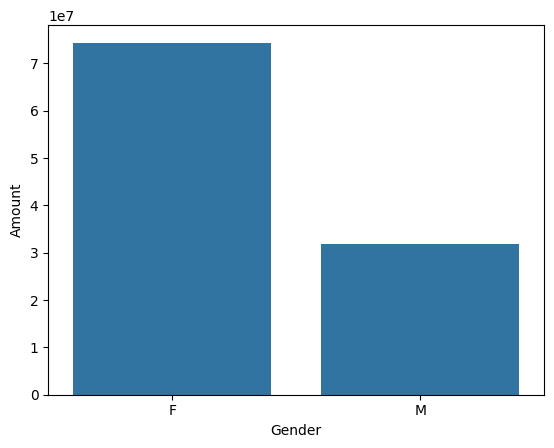

In [20]:
sns.barplot(x='Gender', y='Amount', data = sales_gender)

## Oberservation 1 (Gender)
Female buyers are more than men and females spend more money then men

#### 2. Age Group

<Axes: xlabel='Age Group', ylabel='count'>

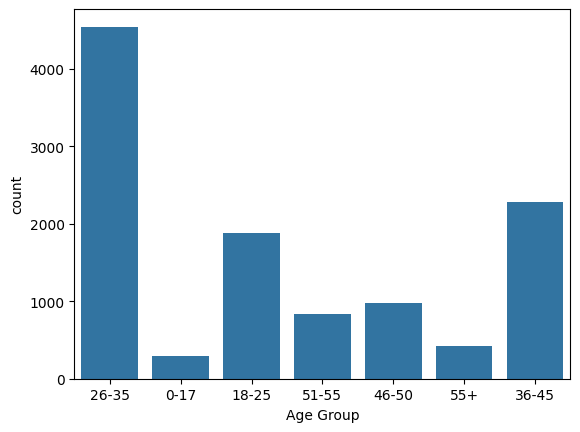

In [21]:
# Both including both men and women
sns.countplot(x = "Age Group", data=data)

##### Sales according to the age group

<Axes: xlabel='Age Group', ylabel='Amount'>

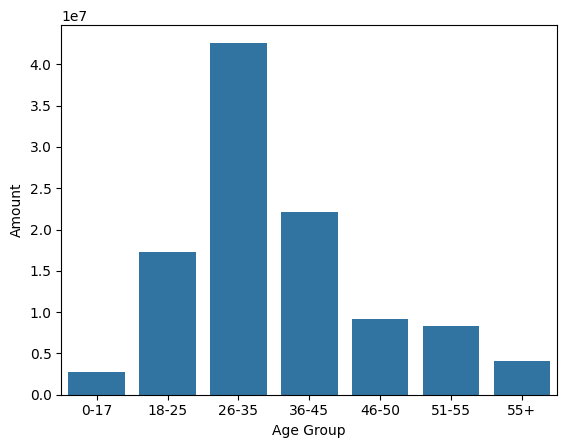

In [22]:
# Sales according to the age group
sales_age_group = data.groupby(["Age Group"], as_index=False)["Amount"].sum()
sns.barplot(x = "Age Group", y = "Amount", data = sales_age_group)


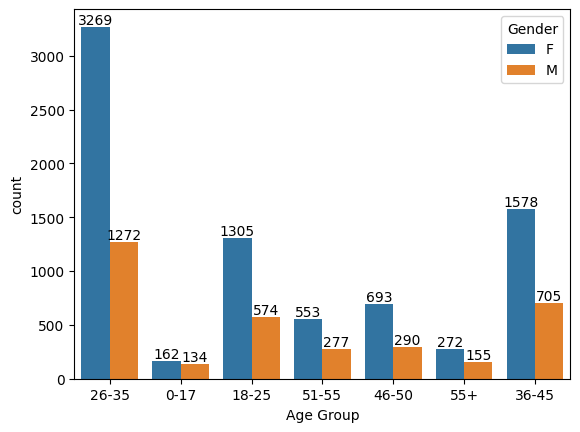

In [23]:
# Seperated based on Gender
vis = sns.countplot(x="Age Group",hue="Gender", data=data)
for bars in vis.containers:
    vis.bar_label(bars)

# Observation 2 (Age)
#### Maximum buyers are from the age group of 26-35 and 36-45 so 26-45

#### 3. Marital_status

In [24]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

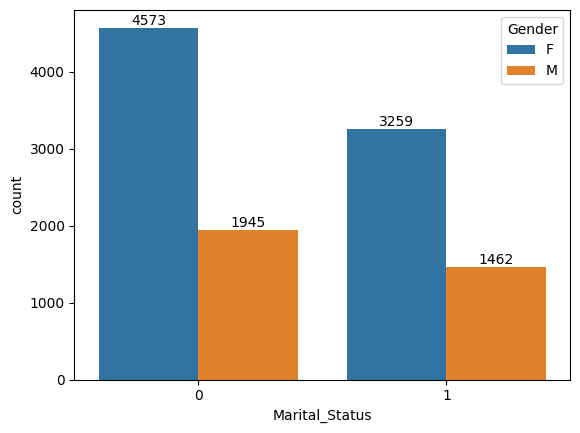

In [25]:
vis = sns.countplot(x = "Marital_Status", hue = "Gender",  data = data)
for bars in vis.containers:
    vis.bar_label(bars)

##### Sales based on Marital status

<Axes: xlabel='Marital_Status', ylabel='Amount'>

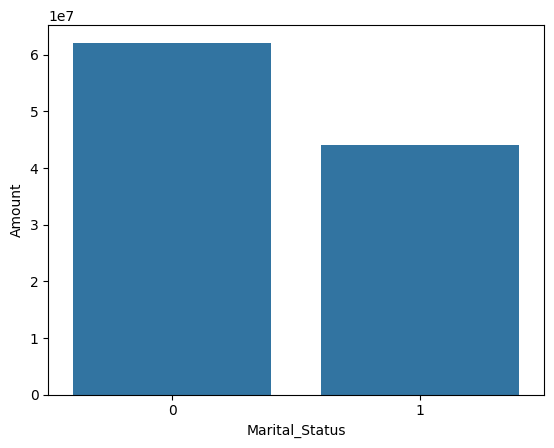

In [26]:
sales_marital = data.groupby(["Marital_Status"], as_index=False)["Amount"].sum().sort_values(by='Amount', ascending=False)
sales_marital
vis = sns.barplot(x = "Marital_Status", y="Amount", data = sales_marital)
vis

### 4. State

In [27]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### Number of orders per state

<Axes: xlabel='State', ylabel='Orders'>

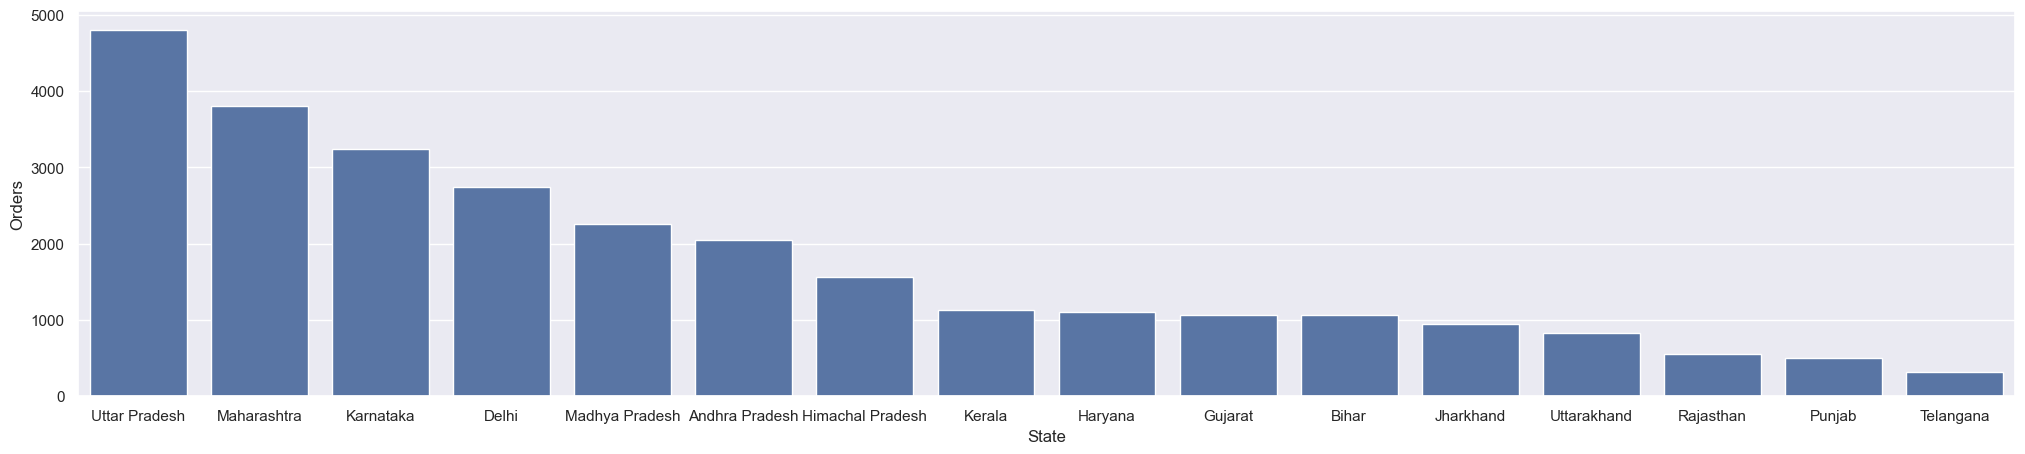

In [28]:
sales_state = data.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state, x='State', y='Orders')

### Observation 4 (State)
#####  Most orders of the sales are from Uttar Pradesh, Maharastra and Karnataka

In [29]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Product_Category', ylabel='count'>

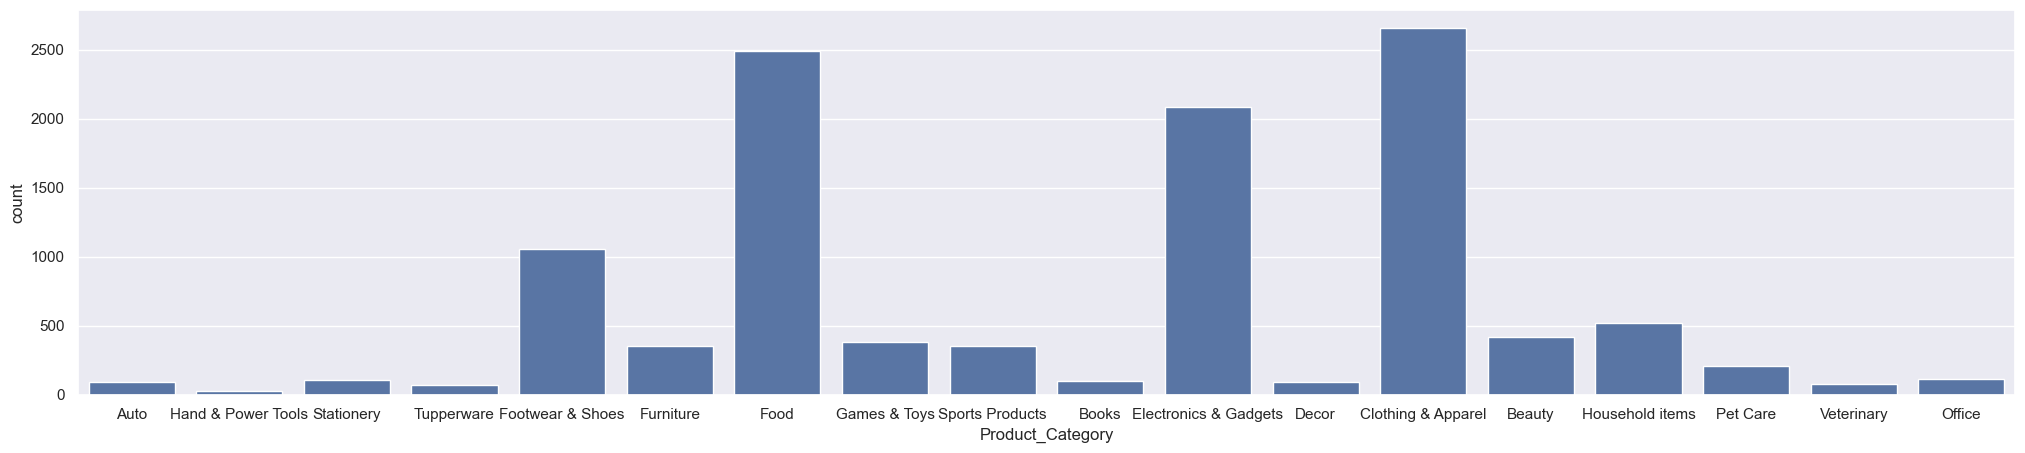

In [30]:
sns.countplot(x="Product_Category", data=data)


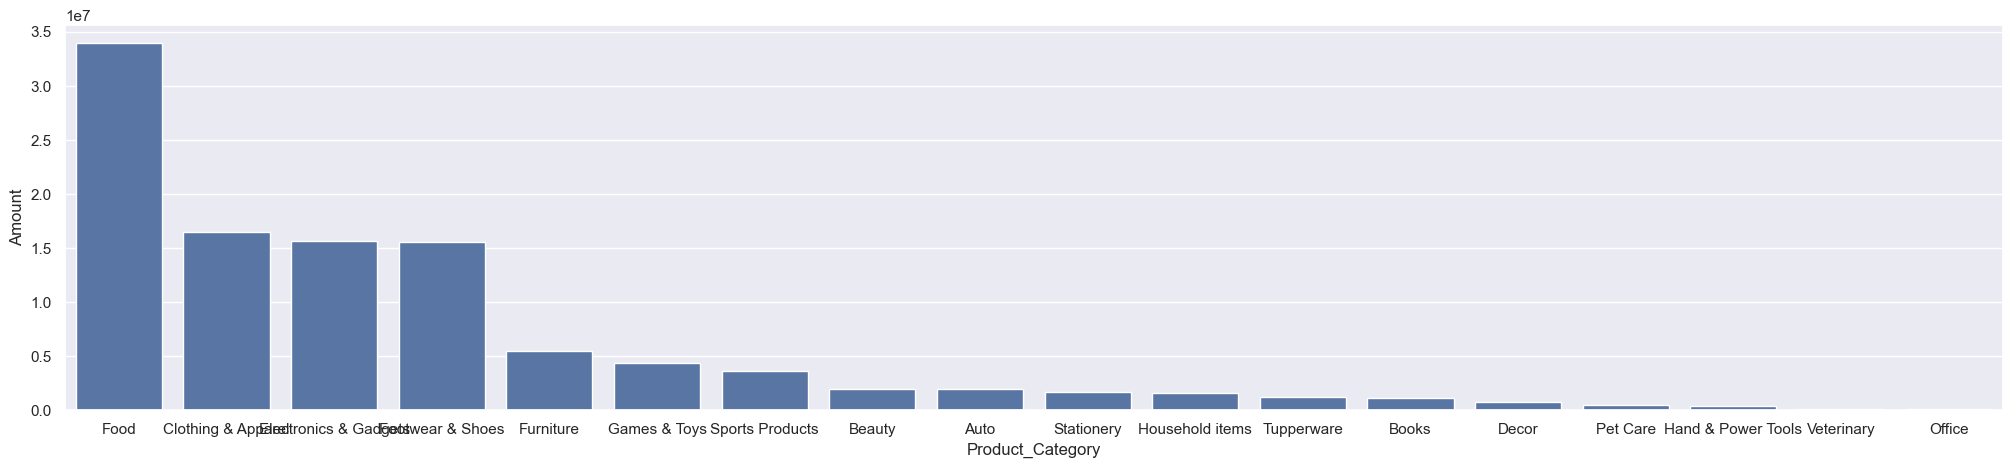

In [31]:
sales_Prod_cat=data.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_Prod_cat
sns.barplot(x="Product_Category", y = "Amount", data= sales_Prod_cat)
sns.set(rc={'figure.figsize':(15,10)})

### Observation 4
### Highest purchase of products category are Food, Clothing and electronics

### 5. Occupation

In [32]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Occupation', ylabel='count'>

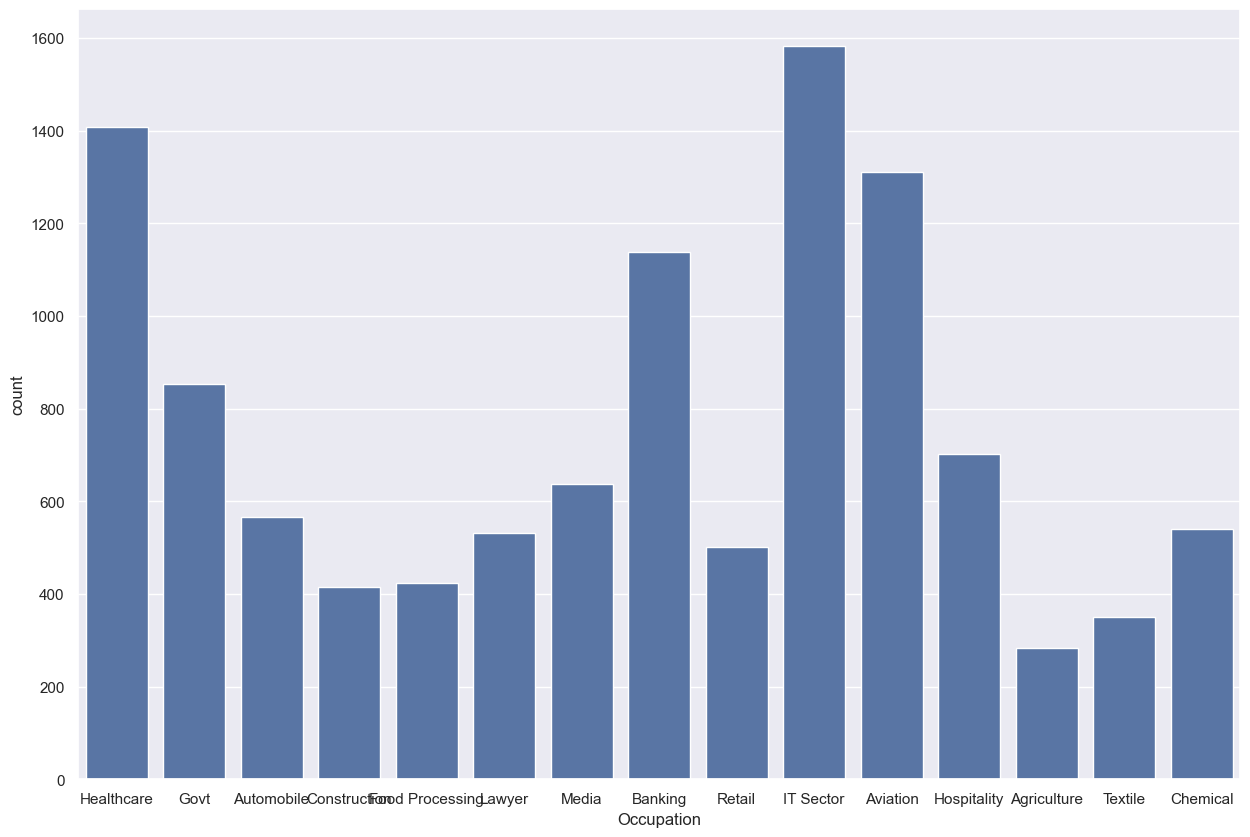

In [33]:
sns.countplot(x="Occupation", data=data)

<Axes: xlabel='Occupation', ylabel='Amount'>

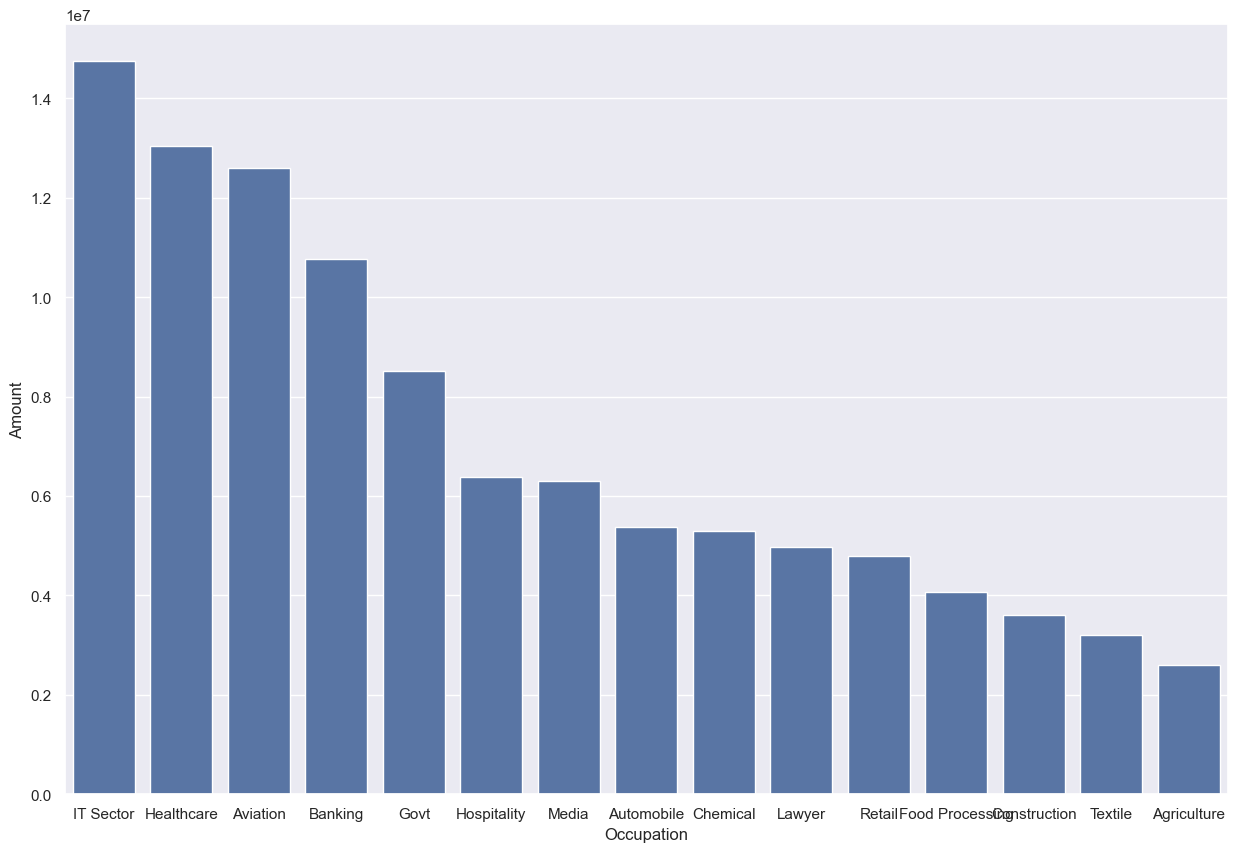

In [36]:
sales_occupation=data.groupby(["Occupation"],as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x='Occupation', y='Amount', data=sales_occupation)

###  Observation 5:
#### Maximum Buyers are having the occupation of IT sectors or Healthcare or Aviation  

# Conclusion
## Married women between the age range of 26-35 from the state (UP, Maharastra and Karnataka) working in the sector of It, healtcare or Aviation are more likely to buy products from food, clothing and electronics